The Predictive Analysis to Determine the Knowledge Level of User Based on Their Study Habits and Exam performance.

INTRODUCTION:
The "User Knowledge" dataset encapsulates the study habits and exam performance of students related to electrical DC machines. It includes variables for study time (STG), study repetition (SCG), related study time (STR), related exam performance (LPR), and core subject exam performance (PEG). The target variable, UNS, is the knowledge level of users. This structured dataset is ready for analysis, containing no missing values and offering a clear path for predicting student knowledge levels. Our research question is: How well can we predict the knowledge level of students based on their study habits and exam performances? . Three input variables we decide to use are STG, SCG, and PEG. These variables are integral as they capture the intensity of study, the repetition of material, and the performance outcome, which are all key factors in understanding and predicting a student’s knowledge level and score ranges. The target variable to predict is UNS, which categorizes knowledge levels into low(0-50), medium(51-122), and high(123-130) based on predefineults. 


PRELIMINARY EXPLORATORY DATA ANALYSIS:

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

New names:
• `` -> `...7`
• `` -> `...8`


tibble [258 × 9] (S3: tbl_df/tbl/data.frame)
 $ STG                   : num [1:258] 0 0.08 0.06 0.1 0.08 0.09 0.1 0.15 0.2 0 ...
 $ SCG                   : num [1:258] 0 0.08 0.06 0.1 0.08 0.15 0.1 0.02 0.14 0 ...
 $ STR                   : num [1:258] 0 0.1 0.05 0.15 0.08 0.4 0.43 0.34 0.35 0.5 ...
 $ LPR                   : num [1:258] 0 0.24 0.25 0.65 0.98 0.1 0.29 0.4 0.72 0.2 ...
 $ PEG                   : num [1:258] 0 0.9 0.33 0.3 0.24 0.66 0.56 0.01 0.25 0.85 ...
 $ UNS                   : chr [1:258] "very_low" "High" "Low" "Middle" ...
 $ ...7                  : logi [1:258] NA NA NA NA NA NA ...
 $ ...8                  : logi [1:258] NA NA NA NA NA NA ...
 $ Attribute Information:: chr [1:258] "STG (The degree of study time for goal object materails)," "SCG (The degree of repetition number of user for goal object materails)" "STR (The degree of study time of user for related objects with goal object)" "LPR (The exam performance of user for related objects with goal object)"

[1] 0

[1] 0

[1] 0

# A tibble: 1 × 5
  Mean_PEG Mean_STG Mean_SCG Total_Observations Rows_With_Missing_Data
     <dbl>    <dbl>    <dbl>              <int>                  <int>
1    0.459    0.371    0.356                258                    768


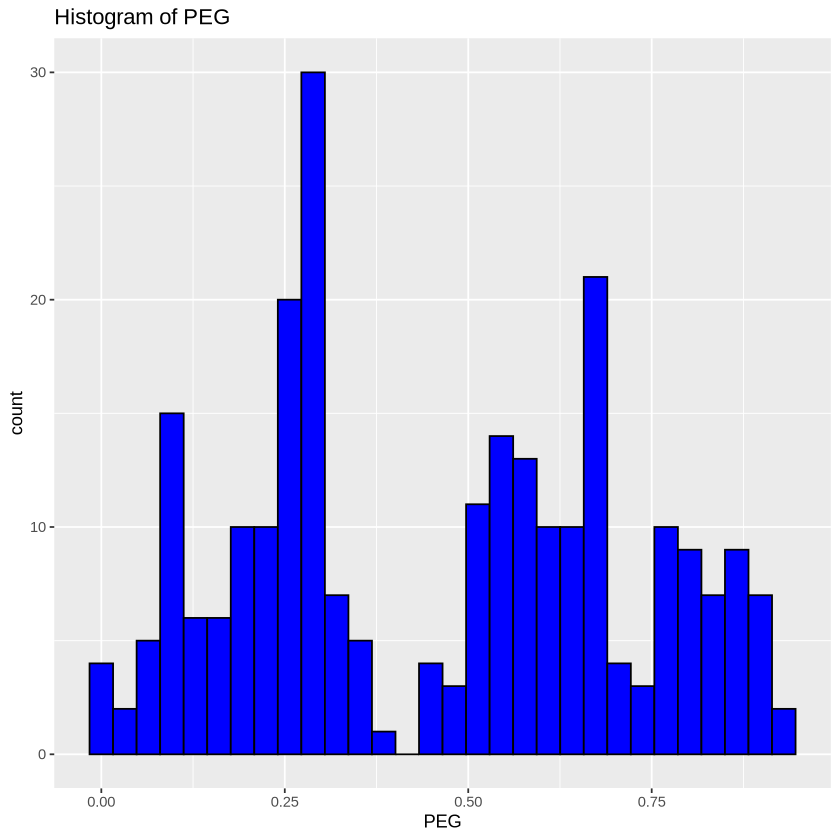

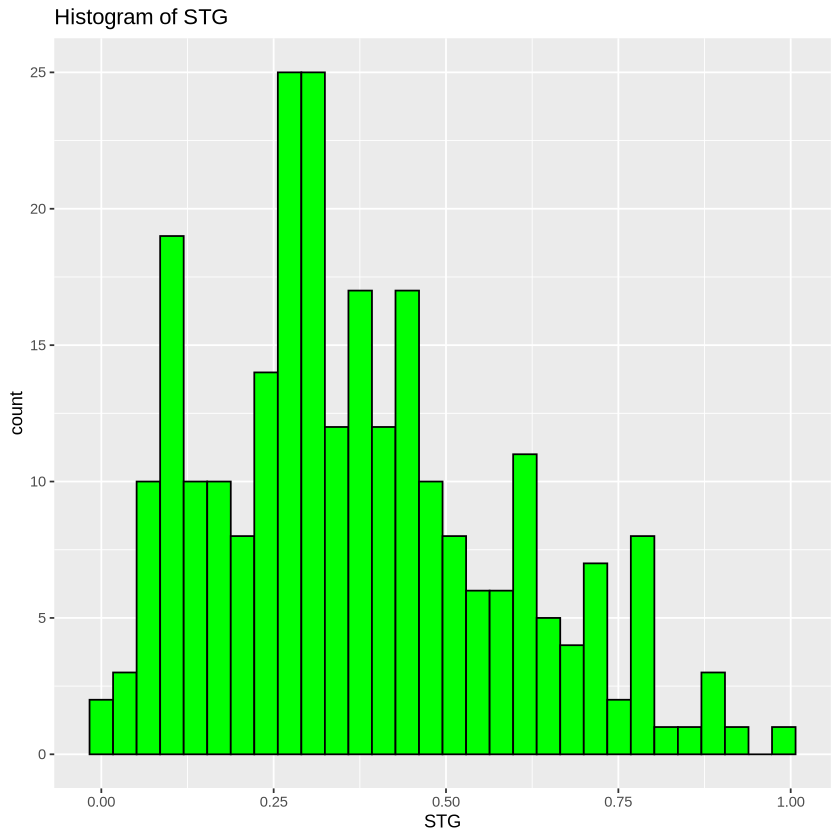

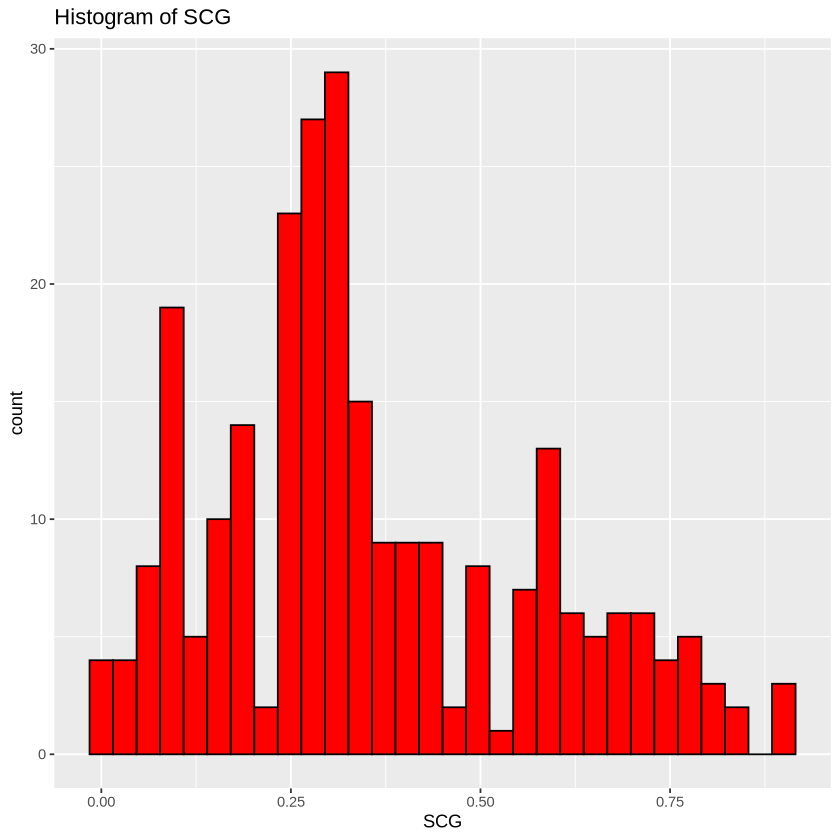

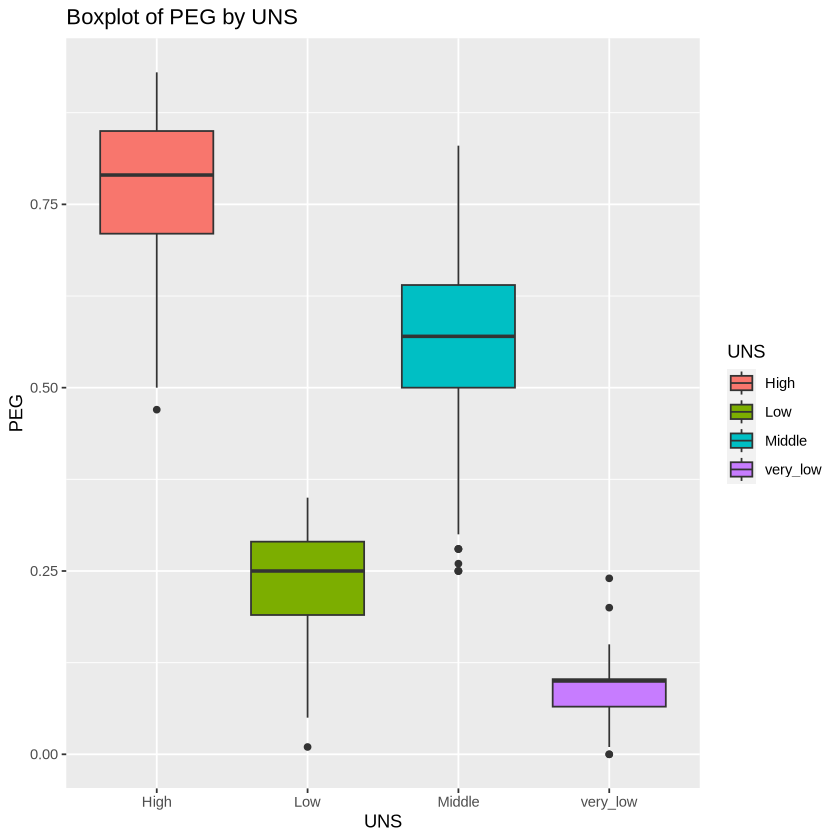

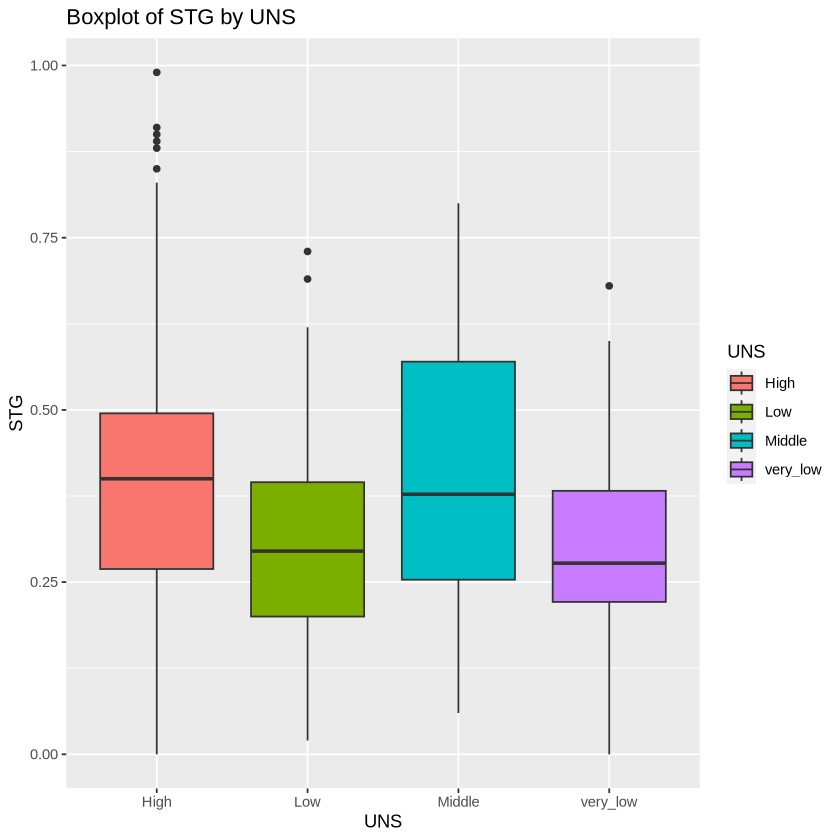

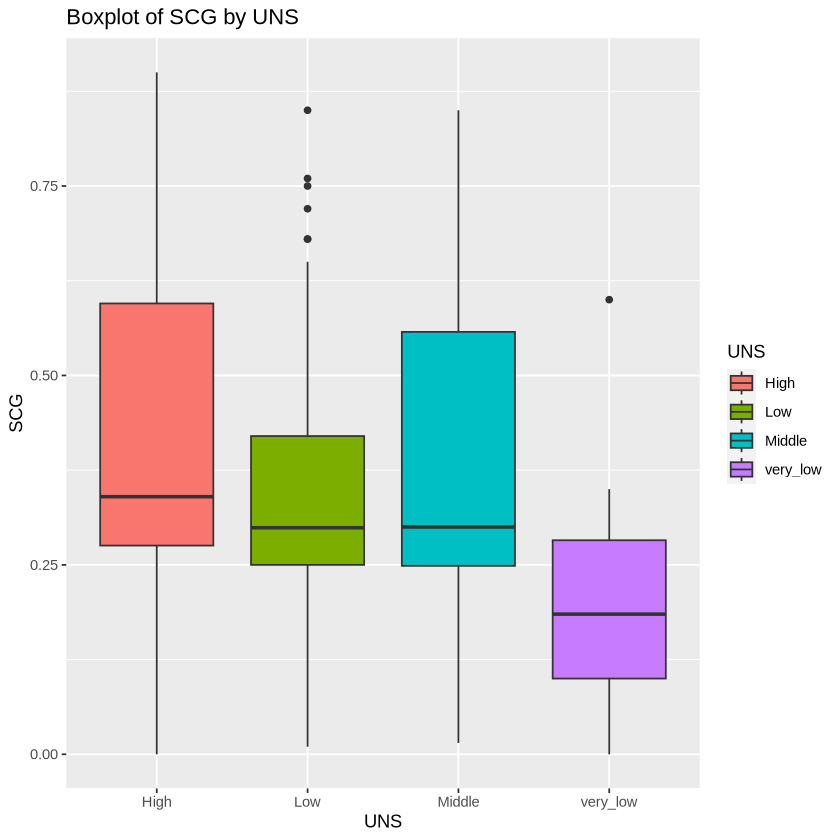

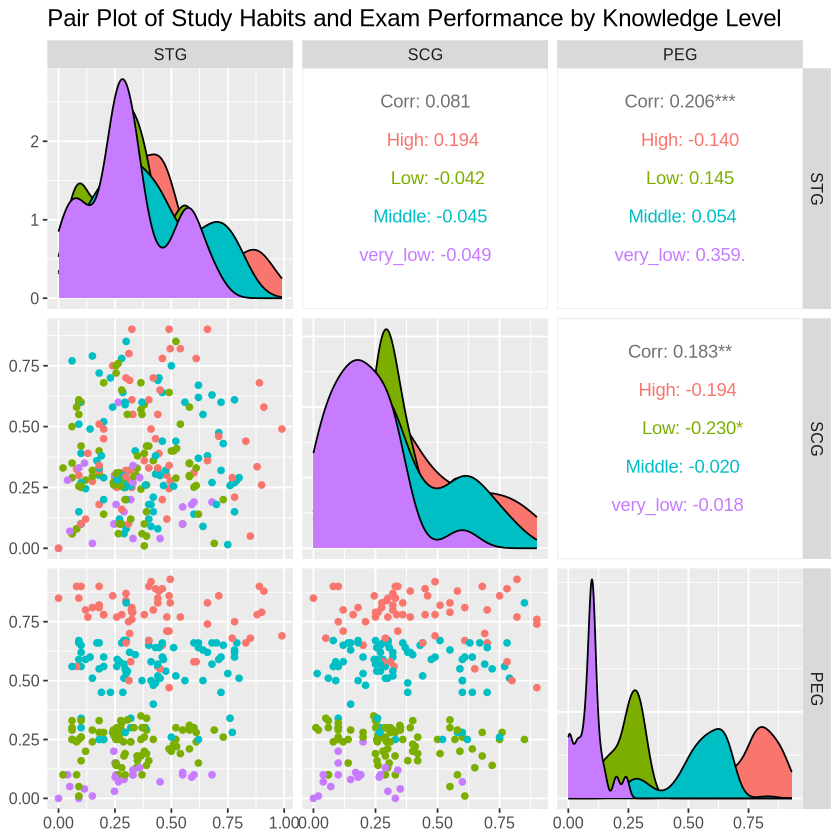

In [12]:
install.packages("readxl")
install.packages("tidyverse")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("GGally")

library(readxl)
url <- "https://archive.ics.uci.edu/static/public/257/user+knowledge+modeling.zip"
download.file(url, destfile = "user_knowledge_modeling.zip", mode = "wb")
unzip("user_knowledge_modeling.zip", exdir = "user_knowledge_data")
correct_path <- "user_knowledge_data/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls"
dataset <- read_excel(correct_path, sheet = "Training_Data")

str(dataset)
sum(is.na(dataset$PEG))
sum(is.na(dataset$STG))
sum(is.na(dataset$SCG))
dataset_clean <- dataset[!is.na(dataset$PEG) & !is.na(dataset$STG) & !is.na(dataset$SCG), ]

library(dplyr)
summary_table <- dataset_clean %>%
  summarise(
    Mean_PEG = mean(PEG, na.rm = TRUE),
    Mean_STG = mean(STG, na.rm = TRUE),
    Mean_SCG = mean(SCG, na.rm = TRUE),
    Total_Observations = n(),
    Rows_With_Missing_Data = sum(is.na(dataset))
  )
print(summary_table)

library(ggplot2)
library(GGally)

# Histograms for each predictor variable
ggplot(dataset_clean, aes(x = PEG)) + 
  geom_histogram(bins = 30, fill = "blue", color = "black") + 
  ggtitle("Histogram of PEG")

ggplot(dataset_clean, aes(x = STG)) + 
  geom_histogram(bins = 30, fill = "green", color = "black") + 
  ggtitle("Histogram of STG")

ggplot(dataset_clean, aes(x = SCG)) + 
  geom_histogram(bins = 30, fill = "red", color = "black") + 
  ggtitle("Histogram of SCG")

# Boxplots for each predictor variable by UNS
ggplot(dataset_clean, aes(x = UNS, y = PEG, fill = UNS)) + 
  geom_boxplot() + 
  ggtitle("Boxplot of PEG by UNS")

ggplot(dataset_clean, aes(x = UNS, y = STG, fill = UNS)) + 
  geom_boxplot() + 
  ggtitle("Boxplot of STG by UNS")

ggplot(dataset_clean, aes(x = UNS, y = SCG, fill = UNS)) + 
  geom_boxplot() + 
  ggtitle("Boxplot of SCG by UNS")

dataset_clean$UNS <- as.factor(dataset_clean$UNS)
ggpairs(dataset_clean, columns = c("STG", "SCG", "PEG"),
        mapping = ggplot2::aes(color = UNS),
        title = "Pair Plot of Study Habits and Exam Performance by Knowledge Level",
        progress = FALSE) + 
  theme(text = element_text(size = 12))


METHODS:
Among predicting variables, STG and SCG are the direct factors affecting UNS because they refer to the amount of time devoted by the user to input more knowledge about the material, therefore these variables have a direct connection to UNS. We are also going to use PEG as a predicting variable because how much knowledge the user was actually able to input during their study period is determined by their exam performance.
To visualize the results, we will create histogram for each predicting variables with bars coloured differently based on UNS. This will let us know the trend between each predicting variable and the class variable. Finally, utilizing K-nearest neighbors classification, we will create multiple new observations to find UNS for each observation and see how well the predictions match our expected results.

EXPECTED OUTCOMES AND SIGNIFICANCE:
We anticipate finding that higher degrees of study time and repetition number will correlate positively with the knowledge level, which implies that the more time a user dedicates to studying and repeating the material, the higher their understanding will be. In addition, we expect to find that exam performance serves as a significant predictor of UNS, indicating that the ability to perform well in exams is a critical factor in furthering their understanding of the subject matter.
This would be significant for both students and teachers as well as education institutions. For students, understanding the direct relationship between study habits (time and repetition) and exam performance with their knowledge level can motivate them to adopt more effective learning strategies. For teachers and educational institutions, these findings can inform design of curriculum that emphasises the integration of assessments and study strategies that promote better understanding among students. This could also open avenues for future research questions, such as investigating the specific types of study habits that are most effective for different types of learners or subjects. 